# Import packages

In [1]:
import os
import sys
from dotenv import load_dotenv
current_dir = os.getcwd()
sys.path.append(os.path.join(os.path.dirname(current_dir),'src'))
sys.path.append(os.path.dirname(current_dir))


In [2]:
from src.bdd_detector.bdd100k_detector import BDD100KDetection
from src.bdd_trainer import Trainer
from src.bdd_utils.model_utils import load_training_arguments_from_env

# Load environment variables
load_dotenv()
%load_ext autoreload
%autoreload 2

In [3]:
current_dir

'/home/jl_fs/bdd100k_detector/notebooks'

# Setup necessary project variables

In [4]:
training_args = load_training_arguments_from_env()
images_save_path = os.environ.get('IMAGES_SAVE_PATH',os.path.abspath('../reports/figures'))
project_location = os.environ.get('PROJECT_ROOT',os.path.abspath('../'))
mlflow_log_location = os.path.join(project_location,'runs','mlflow')
os.makedirs(mlflow_log_location,exist_ok=True)
os.environ['MLFLOW_TRACKING_URI'] = mlflow_log_location
model_download_path = os.path.join(project_location,'models')
model_name  =f'{model_download_path}/yolo11s.pt'

# Initilize trainer

In [5]:
trainer = Trainer(training_args, model_name=model_name)

# Initilize the BDD100KDetection object

In [53]:
bdd100k_detection = BDD100KDetection(training_args,None,trainer=trainer)

{'train_label': '/home/jl_fs/bdd100k_detector/data/labels/bdd100k/labels/det_20/det_train.json', 'val_label': '/home/jl_fs/bdd100k_detector/data/labels/bdd100k/labels/det_20/det_val.json', 'train_images': '/home/jl_fs/bdd100k_detector/data/raw/bdd100k/images/100k/train', 'val_images': '/home/jl_fs/bdd100k_detector/data/raw/bdd100k/images/100k/val', 'train_csv': '/home/jl_fs/bdd100k_detector/data/processed/bdd100k/train.csv', 'val_csv': '/home/jl_fs/bdd100k_detector/data/processed/bdd100k/val.csv'}


/home/jl_fs/bdd100k_detector/src/bdd_detector/bdd100k_detector.py:129: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  self.train_df = pd.read_csv(self.train_csv)


# Create train and validation data loader

In [54]:
train_loader = bdd100k_detection.create_dataloader(
        split="train",
        batch_size=bdd100k_detection.args.batch,
        shuffle=bdd100k_detection.args.shuffle,
        transform=None
    )
val_loader = bdd100k_detection.create_dataloader(
        split="val",
        batch_size=bdd100k_detection.args.batch,
        shuffle=bdd100k_detection.args.shuffle,
        transform=None
    )

In [55]:
# Get a single batch
batch = next(iter(train_loader))

# Access features and labels
images, bbox, labels = batch
print(images.shape)

torch.Size([256, 3, 720, 1280])


[0, 1, 2, 3, 4, 5, 6, 7]


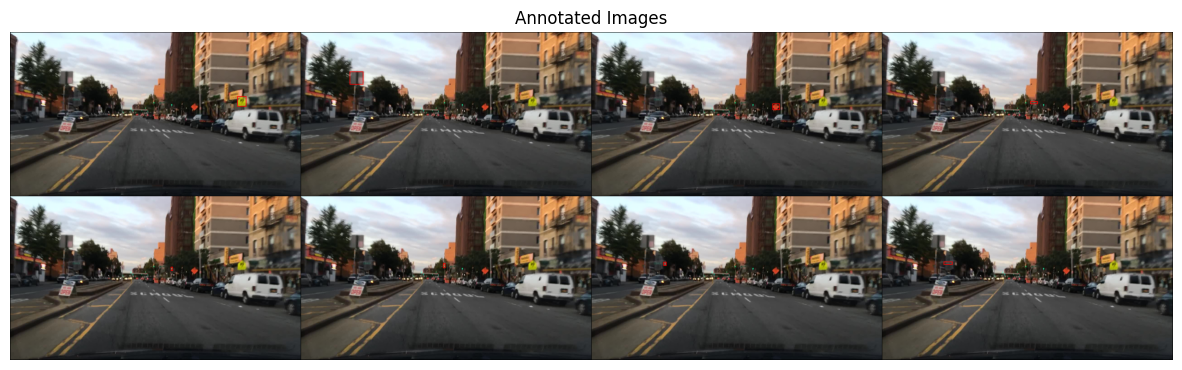

In [41]:
bdd100k_detection.visualize_samples(
        split='val',
        indices=list(range(8)),  # Display the first 8 samples
        display_image=True,
        save_path=None)

In [56]:
bdd100k_detection.create_yolo_config(bdd100k_detection.args.yolo_config_path)
bdd100k_detection.create_labels(force=False)
bdd100k_detection.check_yolo_labels(2, images_save_path)

Creating labels: 100%|██████████| 79863/79863 [00:06<00:00, 11890.88it/s]


Saved visualized image to /home/jl_fs/bdd100k_detector/reports/figures/8139032a-6d369aaf_with_boxes.jpg
Saved visualized image to /home/jl_fs/bdd100k_detector/reports/figures/2e598e8d-0e13f1db_with_boxes.jpg


In [8]:
trainer.train()

Ultralytics 8.3.59 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A5000, 24248MiB)
engine/trainer: task=detect, mode=train, model=/home/jl_fs/bdd100k_detector/models/yolo11s.pt, data=/home/jl_fs/bdd100k_detector/config/bdd100k.yaml, epochs=50, time=None, patience=5, batch=128, imgsz=416, save=True, save_period=5, cache=False, device=0, workers=8, project=/home/jl_fs/bdd100k_detector/runs/bdd100_detector, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

train: Scanning /home/jl_fs/bdd100k_detector/data/raw/bdd100k/labels/100k/train.cache... 69853 images, 147 backgrounds, 0 corrupt: 100%|██████████| 70000/70000 [00:00<?, ?it/s]
val: Scanning /home/jl_fs/bdd100k_detector/data/raw/bdd100k/labels/100k/val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to /home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
MLflow: logging run_id(79e632eaee9c495c990df966d1839d01) to /home/jl_fs/bdd100k_detector/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /home/jl_fs/bdd100k_detector/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to /home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      17.7G      1.359      1.139     0.9894       3316        416: 100%|██████████| 547/547 [03:16<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:26<00:00,  1.53it/s]


                   all      10000     186033       0.66      0.207      0.215      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      19.8G      1.316     0.8599     0.9546       3224        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.55it/s]


                   all      10000     186033      0.484      0.214      0.216      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      18.2G      1.348     0.8787     0.9661       3465        416: 100%|██████████| 547/547 [03:08<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:27<00:00,  1.44it/s]


                   all      10000     186033      0.446      0.194      0.182     0.0966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      18.2G       1.34     0.8716     0.9672       3455        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:26<00:00,  1.53it/s]


                   all      10000     186033      0.633      0.203      0.203       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      21.5G      1.298     0.8322      0.956       3319        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:26<00:00,  1.51it/s]


                   all      10000     186033      0.559      0.216      0.217      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      18.5G      1.272     0.8073     0.9486       3625        416: 100%|██████████| 547/547 [03:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.60it/s]


                   all      10000     186033      0.552      0.229      0.228      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      18.3G      1.256     0.7898     0.9447       3646        416: 100%|██████████| 547/547 [03:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.61it/s]


                   all      10000     186033      0.607      0.236       0.24      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        21G      1.243     0.7767     0.9404       3390        416: 100%|██████████| 547/547 [03:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.57it/s]


                   all      10000     186033      0.594       0.24      0.246      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      18.8G      1.232     0.7679     0.9379       3579        416: 100%|██████████| 547/547 [03:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.56it/s]


                   all      10000     186033      0.623      0.254      0.257      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      20.2G      1.225     0.7585     0.9355       3559        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.61it/s]


                   all      10000     186033      0.606      0.247       0.26      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      17.6G      1.214     0.7498     0.9326       3356        416: 100%|██████████| 547/547 [03:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.61it/s]


                   all      10000     186033        0.6      0.259      0.264      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      17.3G      1.208      0.744      0.931       3285        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.60it/s]


                   all      10000     186033       0.63       0.26      0.269       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      17.9G      1.204     0.7401     0.9298       3449        416: 100%|██████████| 547/547 [03:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.59it/s]


                   all      10000     186033      0.616      0.259      0.272      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        17G      1.198     0.7352     0.9277       3229        416: 100%|██████████| 547/547 [03:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.61it/s]


                   all      10000     186033      0.637      0.259       0.28      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      19.4G      1.194     0.7299     0.9275       3448        416: 100%|██████████| 547/547 [03:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.59it/s]


                   all      10000     186033      0.633      0.266      0.281      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      18.5G       1.19     0.7262     0.9257       3088        416: 100%|██████████| 547/547 [03:08<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.57it/s]


                   all      10000     186033      0.627       0.27      0.286      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      18.3G      1.185     0.7219      0.925       3425        416: 100%|██████████| 547/547 [03:08<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 8/40 [00:05<00:21,  1.50it/s]

In [6]:
trainer.resume_train('/home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/weights/epoch20.pt')

Ultralytics 8.3.59 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A5000, 24248MiB)
engine/trainer: task=detect, mode=train, model=/home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/weights/epoch20.pt, data=/home/jl_fs/bdd100k_detector/config/bdd100k.yaml, epochs=50, time=None, patience=5, batch=128, imgsz=416, save=True, save_period=5, cache=False, device=0, workers=8, project=/home/jl_fs/bdd100k_detector/runs/bdd100_detector, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/weights/epoch20.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, 

train: Scanning /home/jl_fs/bdd100k_detector/data/raw/bdd100k/labels/100k/train.cache... 69853 images, 147 backgrounds, 0 corrupt: 100%|██████████| 70000/70000 [00:00<?, ?it/s]
val: Scanning /home/jl_fs/bdd100k_detector/data/raw/bdd100k/labels/100k/val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to /home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
Resuming training /home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/weights/epoch20.pt from epoch 22 to 50 total epochs
MLflow: logging run_id(8611e5bb4f94427592f1085b044d5baf) to /home/jl_fs/bdd100k_detector/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /home/jl_fs/bdd100k_detector/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to /home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

      22/50      17.8G      1.166     0.7014     0.9192       3316        416: 100%|██████████| 547/547 [03:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.65it/s]


                   all      10000     186033      0.656      0.281      0.301       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      19.8G      1.166     0.7026     0.9194       3224        416: 100%|██████████| 547/547 [03:08<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.61it/s]


                   all      10000     186033      0.646      0.283      0.299       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      18.2G      1.164     0.7001      0.919       3465        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]


                   all      10000     186033      0.667      0.277      0.301      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      18.2G      1.158     0.6951     0.9171       3455        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.64it/s]


                   all      10000     186033      0.662      0.281      0.303      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      21.5G      1.154     0.6926     0.9157       3319        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]


                   all      10000     186033      0.661      0.281      0.304      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      18.4G      1.152     0.6903     0.9152       3625        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.57it/s]


                   all      10000     186033      0.661      0.281      0.304      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      18.3G      1.151     0.6876     0.9153       3646        416: 100%|██████████| 547/547 [03:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]


                   all      10000     186033      0.666      0.279      0.305      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        21G      1.148      0.685      0.914       3390        416: 100%|██████████| 547/547 [03:08<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]


                   all      10000     186033       0.67       0.28      0.306      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      18.8G      1.143     0.6824     0.9133       3579        416: 100%|██████████| 547/547 [03:09<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.63it/s]


                   all      10000     186033      0.672       0.28      0.307      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      20.2G      1.143     0.6792     0.9123       3559        416: 100%|██████████| 547/547 [03:09<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.60it/s]


                   all      10000     186033      0.651      0.287      0.307      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      17.6G      1.136     0.6746     0.9108       3356        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]


                   all      10000     186033      0.664      0.283      0.308      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      17.3G      1.133     0.6717     0.9104       3285        416: 100%|██████████| 547/547 [03:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.64it/s]


                   all      10000     186033       0.67      0.281      0.309      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      17.9G      1.132     0.6699     0.9095       3449        416: 100%|██████████| 547/547 [03:09<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.60it/s]


                   all      10000     186033      0.667      0.283      0.309      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        17G      1.127     0.6671     0.9081       3229        416: 100%|██████████| 547/547 [03:09<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]


                   all      10000     186033       0.67      0.283       0.31      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      19.4G      1.125     0.6632     0.9084       3448        416: 100%|██████████| 547/547 [03:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.57it/s]


                   all      10000     186033      0.664      0.285       0.31      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      18.5G      1.121     0.6606     0.9066       3088        416: 100%|██████████| 547/547 [03:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.56it/s]


                   all      10000     186033      0.665      0.287      0.311      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      18.3G      1.117     0.6558     0.9057       3425        416: 100%|██████████| 547/547 [03:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.55it/s]


                   all      10000     186033      0.666      0.287      0.311      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      16.1G      1.114     0.6529      0.905       3327        416: 100%|██████████| 547/547 [03:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.55it/s]


                   all      10000     186033      0.658       0.29      0.312      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        21G      1.112     0.6507     0.9041       3236        416: 100%|██████████| 547/547 [03:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.54it/s]


                   all      10000     186033      0.657      0.291      0.312      0.179
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      14.4G      1.148     0.6516     0.9045       1822        416: 100%|██████████| 547/547 [03:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.56it/s]


                   all      10000     186033       0.66      0.291      0.312      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      14.4G      1.142     0.6458      0.902       1967        416: 100%|██████████| 547/547 [03:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.54it/s]


                   all      10000     186033      0.659      0.291      0.312      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      14.6G      1.137     0.6399      0.901       1858        416: 100%|██████████| 547/547 [03:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]


                   all      10000     186033       0.66      0.291      0.313      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.6G      1.134     0.6365     0.8997       1897        416: 100%|██████████| 547/547 [03:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]


                   all      10000     186033      0.659      0.292      0.313       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      14.7G      1.128     0.6304     0.8972       1959        416: 100%|██████████| 547/547 [03:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.63it/s]


                   all      10000     186033      0.659      0.292      0.313       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.5G      1.124     0.6256      0.897       1607        416: 100%|██████████| 547/547 [03:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.61it/s]


                   all      10000     186033      0.662      0.294      0.314       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      14.3G      1.118     0.6203     0.8952       1814        416: 100%|██████████| 547/547 [03:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.61it/s]


                   all      10000     186033      0.661      0.293      0.314       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      14.4G      1.114     0.6149     0.8941       1799        416: 100%|██████████| 547/547 [03:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


                   all      10000     186033      0.666      0.291      0.314      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      14.5G      1.108     0.6101     0.8932       1925        416: 100%|██████████| 547/547 [03:43<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


                   all      10000     186033      0.669      0.291      0.314      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      14.5G      1.104     0.6052     0.8912       1859        416: 100%|██████████| 547/547 [03:44<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


                   all      10000     186033      0.669       0.29      0.315      0.181

29 epochs completed in 1.754 hours.
Optimizer stripped from /home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/weights/last.pt, 19.1MB
Optimizer stripped from /home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/weights/best.pt, 19.1MB

Validating /home/jl_fs/bdd100k_detector/runs/bdd100_detector/train2/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A5000, 24248MiB)
YOLO11s summary (fused): 238 layers, 9,417,831 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [01:06<00:00,  1.67s/it]


                   all      10000     186033      0.669       0.29      0.315      0.181
               bicycle        592       1039      0.428      0.351      0.314       0.15
                   bus       1299       1660      0.625      0.467      0.523      0.406
                   car       9882     102837      0.755      0.635       0.69      0.446
            motorcycle        346        460        0.6      0.287      0.334      0.162
          other person          1          1          1          0          0          0
         other vehicle         70         85      0.148     0.0471     0.0444     0.0299
            pedestrian       3261      13425      0.625      0.417       0.46      0.217
                 rider        527        658      0.522      0.328      0.327      0.155
         traffic light       5651      26884       0.66      0.341      0.392      0.145
          traffic sign       8211      34724      0.686      0.397      0.458      0.238
               traile

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x70faecac3b80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [62]:
os.environ['MLFLOW_TRACKING_URI']

'runs/mlflow'